In [1]:
import numpy as np
import tensorflow as tf
tf.enable_eager_execution( )
tf.set_random_seed(777)  # for reproducibility

print(tf.__version__)


/anaconda3/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print (x_train)

[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02]]


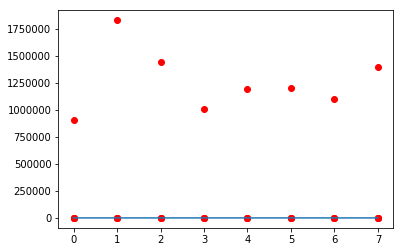

In [11]:
plt.plot(x_train, 'ro') # ro = red point
plt.plot(y_train)
plt.show()

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


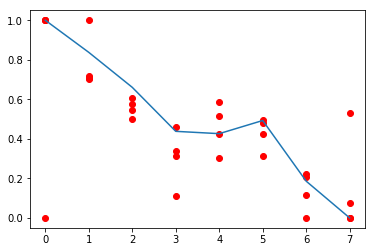

In [14]:
def normalization(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator

xy=normalization(xy)
print(xy)

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

In [16]:
#data input to tensorflow and specify batch size
dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(len(x_train)) 

In [25]:
W = tf.contrib.eager.Variable(tf.random_normal([4, 1]), dtype=tf.float32)
b = tf.contrib.eager.Variable(tf.random_normal([1]), dtype=tf.float32)

In [26]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

In [27]:
# make L2 loss function
def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

In [28]:
# reduce L2 loss function
def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

In [35]:
is_decay = True
starter_learning_rate = 0.1

if(is_decay):
    global_step = tf.contrib.eager.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 50, 0.96, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
else:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

In [38]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in tf.contrib.eager.Iterator(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]), global_step=global_step)
        if step % 10 == 0:
            print("Iter: {}, Loss: {:.4f}, Learning Rate: {:.8f}".format(step, loss_value, optimizer._learning_rate()))
    

Iter: 0, Loss: 0.0044, Learning Rate: 0.09216000
grads_and_vars
Iter: 10, Loss: 0.0043, Learning Rate: 0.09216000
grads_and_vars
Iter: 20, Loss: 0.0042, Learning Rate: 0.09216000
grads_and_vars
Iter: 30, Loss: 0.0042, Learning Rate: 0.09216000
grads_and_vars
Iter: 40, Loss: 0.0041, Learning Rate: 0.09216000
grads_and_vars
Iter: 50, Loss: 0.0041, Learning Rate: 0.08847360
grads_and_vars
Iter: 60, Loss: 0.0041, Learning Rate: 0.08847360
grads_and_vars
Iter: 70, Loss: 0.0041, Learning Rate: 0.08847360
grads_and_vars
Iter: 80, Loss: 0.0040, Learning Rate: 0.08847360
grads_and_vars
Iter: 90, Loss: 0.0040, Learning Rate: 0.08847360
grads_and_vars
Iter: 100, Loss: 0.0040, Learning Rate: 0.08493464
grads_and_vars
